### Batch Runner of ModularCirc

This file samples the input parameters of the Korakianitis model then batch solves this using ModularCirc. The raw output, pressure traces, cardiac output are all saved. Additionally a PCA is run on the pressure traces and are also saved.

In [1]:
from ModularCirc.Models.KorakianitisMixedModel import KorakianitisMixedModel, KorakianitisMixedModel_parameters, TEMPLATE_TIME_SETUP_DICT
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
from ModularCirc import BatchRunner

In [3]:
br = BatchRunner('Sobol', 0) 
#'LHS' : LatinHypercube,
#'Sobol' : Sobol,
#'Halton': Halton,

In [4]:
path = os.getcwd()
path

'/Users/pmzff/Documents/GitHub/ModularCircFF/ExploreModularCirc'

In [5]:
# Parameters_01 = Korakianitis Model
br.setup_sampler('parameters_02.json')

In [6]:
# Set number of samples 
n_sample = 5000
br.sample(n_sample)

/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/scipy/stats/_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


In [7]:
br.samples

sas.r     sas.c     sas.l     sat.r     sat.c     sat.l     svn.r  \
0     0.004052  0.114509  0.000053  0.925069  1.023913  0.001803  0.069190   
1     0.001690  0.072214  0.000067  1.558170  1.846973  0.001607  0.088602   
2     0.002818  0.089454  0.000044  0.593984  2.035777  0.001217  0.052570   
3     0.003680  0.047260  0.000092  1.235169  1.211961  0.002196  0.108168   
4     0.003279  0.090641  0.000076  1.092825  1.574651  0.002106  0.042848   
...        ...       ...       ...       ...       ...       ...       ...   
4995  0.003680  0.042290  0.000053  1.321360  0.811489  0.000927  0.045077   
4996  0.003237  0.095746  0.000038  1.198833  1.173799  0.001674  0.110938   
4997  0.002598  0.058468  0.000082  0.766095  1.997614  0.001710  0.054179   
4998  0.002226  0.100719  0.000059  1.394404  2.185274  0.002156  0.086115   
4999  0.004365  0.063505  0.000077  0.953061  1.362216  0.001230  0.067885   

          svn.c     pas.r     pas.c  ...  ao.RRA  mi.RRA  po.RRA  ti.RRA  \
0     18.228856  0.001374  0.245804  ...       0       0       0       0   
1     30.052234  0.002245  0.139568  ...       0       0       0       0   
2     22.333355  0.002551  0.098213  ...       0       0       0       0   
3     10.414924  0.001922  0.191447  ...       0       0       0       0   
4     24.249495  0.002967  0.173215  ...       0       0       0       0   
...         ...       ...       ...  ...     ...     ...     ...     ...   
4995  19.707024  0.002716  0.129187  ...       0       0       0       0   
4996  27.768776  0.001673  0.237409  ...       0       0       0       0   
4997  16.510909  0.002802  0.142241  ...       0       0       0       0   
4998  14.054665  0.002496  0.095354  ...       0       0       0       0   
4999  25.257517  0.001125  0.200008  ...       0       0       0       0   

      lv.v  la.tpwb  la.v  rv.v  ra.tpwb  ra.v  
0       20        0    20    20        0    20  
1       20        0    20    20        0    20  
2       20        0    20    20        0    20  
3       20        0    20    20        0    20  
4       20        0    20    20        0    20  
...    ...      ...   ...   ...      ...   ...  
4995    20        0    20    20        0    20  
4996    20        0    20    20        0    20  
4997    20        0    20    20        0    20  
4998    20        0    20    20        0    20  
4999    20        0    20    20        0    20  

[5000 rows x 60 columns]

In [8]:
TEMPLATE_TIME_SETUP_DICT

{'name': 'TimeTest',
 'ncycles': 30,
 'tcycle': 1.0,
 'dt': 0.001,
 'export_min': 2}

In [9]:
map_ = {
    'delay' : ['la.delay', 'ra.delay'],
    'td0'   : ['lv.td0',   'rv.td0' ],
    'tr'    : ['lv.tr',    'rv.tr'  ],
    'tpww'  : ['la.tpww',  'ra.tpww'],
}
br.map_sample_timings(
    ref_time=1.,
    map=map_
    )

In [10]:
br.samples.columns

Index(['sas.r', 'sas.c', 'sas.l', 'sat.r', 'sat.c', 'sat.l', 'svn.r', 'svn.c',
       'pas.r', 'pas.c', 'pas.l', 'pat.r', 'pat.c', 'pat.l', 'pvn.r', 'pvn.c',
       'ao.CQ', 'mi.CQ', 'po.CQ', 'ti.CQ', 'lv.E_pas', 'lv.E_act', 'lv.v_ref',
       'lv.k_pas', 'la.E_pas', 'la.E_act', 'la.v_ref', 'la.k_pas', 'rv.E_pas',
       'rv.E_act', 'rv.v_ref', 'rv.k_pas', 'ra.E_pas', 'ra.E_act', 'ra.v_ref',
       'ra.k_pas', 'T', 'v_tot', 'sas.v_ref', 'sat.v_ref', 'svn.l',
       'svn.v_ref', 'pas.v_ref', 'pat.v_ref', 'pvn.l', 'pvn.v_ref', 'ao.RRA',
       'mi.RRA', 'po.RRA', 'ti.RRA', 'lv.v', 'la.tpwb', 'la.v', 'rv.v',
       'ra.tpwb', 'ra.v', 'la.delay', 'ra.delay', 'lv.td0', 'rv.td0', 'lv.tr',
       'rv.tr', 'la.tpww', 'ra.tpww'],
      dtype='object')

In [11]:
br._samples[['lv.td', 'rv.td']] = br._samples[['lv.tr', 'rv.tr']].values + br._samples[['lv.td0', 'rv.td0']].values
br._samples.drop(['lv.td0', 'rv.td0'], axis=1, inplace=True)

In [12]:
br.samples

sas.r     sas.c     sas.l     sat.r     sat.c     sat.l     svn.r  \
0     0.004052  0.114509  0.000053  0.925069  1.023913  0.001803  0.069190   
1     0.001690  0.072214  0.000067  1.558170  1.846973  0.001607  0.088602   
2     0.002818  0.089454  0.000044  0.593984  2.035777  0.001217  0.052570   
3     0.003680  0.047260  0.000092  1.235169  1.211961  0.002196  0.108168   
4     0.003279  0.090641  0.000076  1.092825  1.574651  0.002106  0.042848   
...        ...       ...       ...       ...       ...       ...       ...   
4995  0.003680  0.042290  0.000053  1.321360  0.811489  0.000927  0.045077   
4996  0.003237  0.095746  0.000038  1.198833  1.173799  0.001674  0.110938   
4997  0.002598  0.058468  0.000082  0.766095  1.997614  0.001710  0.054179   
4998  0.002226  0.100719  0.000059  1.394404  2.185274  0.002156  0.086115   
4999  0.004365  0.063505  0.000077  0.953061  1.362216  0.001230  0.067885   

          svn.c     pas.r     pas.c  ...  ra.tpwb  ra.v  la.delay  ra.delay  \
0     18.228856  0.001374  0.245804  ...        0    20  0.088310  0.088310   
1     30.052234  0.002245  0.139568  ...        0    20  0.102714  0.102714   
2     22.333355  0.002551  0.098213  ...        0    20  0.136768  0.136768   
3     10.414924  0.001922  0.191447  ...        0    20  0.118086  0.118086   
4     24.249495  0.002967  0.173215  ...        0    20  0.094819  0.094819   
...         ...       ...       ...  ...      ...   ...       ...       ...   
4995  19.707024  0.002716  0.129187  ...        0    20  0.151561  0.151561   
4996  27.768776  0.001673  0.237409  ...        0    20  0.143778  0.143778   
4997  16.510909  0.002802  0.142241  ...        0    20  0.070519  0.070519   
4998  14.054665  0.002496  0.095354  ...        0    20  0.201618  0.201618   
4999  25.257517  0.001125  0.200008  ...        0    20  0.070118  0.070118   

         lv.tr     rv.tr   la.tpww   ra.tpww     lv.td     rv.td  
0     0.299551  0.299551  0.082138  0.082138  0.394829  0.394829  
1     0.075849  0.075849  0.035587  0.035587  0.159482  0.159482  
2     0.333460  0.333460  0.093059  0.093059  0.423928  0.423928  
3     0.153636  0.153636  0.036834  0.036834  0.262613  0.262613  
4     0.148393  0.148393  0.032319  0.032319  0.232612  0.232612  
...        ...       ...       ...       ...       ...       ...  
4995  0.244416  0.244416  0.085073  0.085073  0.330018  0.330018  
4996  0.268552  0.268552  0.066205  0.066205  0.328859  0.328859  
4997  0.096952  0.096952  0.025763  0.025763  0.173452  0.173452  
4998  0.370964  0.370964  0.114201  0.114201  0.472464  0.472464  
4999  0.119486  0.119486  0.051497  0.051497  0.263852  0.263852  

[5000 rows x 64 columns]

In [13]:
br.map_vessel_volume()


In [14]:
# Quick stats on some parameters
br._samples[['svn.c', 'pat.r', 'pat.c', 'svn.c']].describe().T

count       mean       std        min        25%        50%  \
svn.c  5000.0  20.500128  5.918199  10.254547  15.376048  20.499383   
pat.r  5000.0   0.697556  0.313244   0.155066   0.426270   0.697448   
pat.c  5000.0   2.872942  1.632459   0.045688   1.459132   2.872947   
svn.c  5000.0  20.500128  5.918199  10.254547  15.376048  20.499383   

             75%        max  
svn.c  25.623539  30.745783  
pat.r   0.968774   1.239928  
pat.c   4.286354   5.699505  
svn.c  25.623539  30.745783

In [15]:
br.setup_model(model=KorakianitisMixedModel, po=KorakianitisMixedModel_parameters, time_setup=TEMPLATE_TIME_SETUP_DICT)

In [16]:
input_header = ','.join(br.samples.columns)
input_header

'sas.r,sas.c,sas.l,sat.r,sat.c,sat.l,svn.r,svn.c,pas.r,pas.c,pas.l,pat.r,pat.c,pat.l,pvn.r,pvn.c,ao.CQ,mi.CQ,po.CQ,ti.CQ,lv.E_pas,lv.E_act,lv.v_ref,lv.k_pas,la.E_pas,la.E_act,la.v_ref,la.k_pas,rv.E_pas,rv.E_act,rv.v_ref,rv.k_pas,ra.E_pas,ra.E_act,ra.v_ref,ra.k_pas,T,sas.v_ref,sat.v_ref,svn.l,svn.v_ref,pas.v_ref,pat.v_ref,pvn.l,pvn.v_ref,ao.RRA,mi.RRA,po.RRA,ti.RRA,lv.v,la.tpwb,la.v,rv.v,ra.tpwb,ra.v,la.delay,ra.delay,lv.tr,rv.tr,la.tpww,ra.tpww,lv.td,rv.td,sas.v,sat.v,svn.v,pas.v,pat.v,pvn.v'

In [17]:
# Save sampled inputs to CSV
os.system(f'mkdir -p {path+'/Input'}')
np.savetxt(path+f'/Input/input_{n_sample}.csv', br.samples, header=input_header, delimiter=',')

In [18]:
os.system(f'mkdir -p {path+'/Outputs/Output_5000/Output_5000_raw'}')
test = br.run_batch(n_jobs=5, output_path=path+f'/Outputs/Output_5000/Output_5000_raw')

100%|██████████| 5000/5000 [1:01:01<00:00,  1.37it/s]


In [19]:
# Summary stats of output of first realisation
ind = 0
test[ind].loc[ind].describe()

v_la         v_lv        v_sas        v_sat        v_svn  \
count  1001.000000  1001.000000  1001.000000  1001.000000  1001.000000   
mean    183.965537   179.008851    15.077780   134.314696   305.794536   
std      36.246902    31.754737     2.017122    18.068366     4.047498   
min      68.340599   137.400438    11.775153   105.072342   299.983383   
25%     186.657404   148.677445    13.227254   117.819055   302.298827   
50%     198.620250   177.565675    15.014747   133.808214   306.321404   
75%     203.959222   213.290817    16.937218   150.941031   307.154216   
max     210.068306   225.139367    18.185655   162.125165   315.539178   

              v_ra         v_rv        v_pas        v_pat        v_pvn  ...  \
count  1001.000000  1001.000000  1001.000000  1001.000000  1001.000000  ...   
mean    124.990911   281.902097    37.151082   698.801211   216.786772  ...   
std      18.403111    34.748152     1.091986    21.563547    26.163025  ...   
min      83.722863   238.261240    35.146543   661.470486   198.758392  ...   
25%     111.703575   255.093326    36.364635   677.842611   202.324319  ...   
50%     134.504714   267.969854    37.216415   700.126835   206.794773  ...   
75%     139.289154   327.232393    38.128952   717.641845   213.994686  ...   
max     146.434692   327.796931    38.899368   731.900351   304.321485  ...   

              q_po        p_pas        p_pat        q_pas        p_pvn  \
count  1001.000000  1001.000000  1001.000000  1001.000000  1001.000000   
mean    123.719987   151.140824   150.971363   123.356827     7.766806   
std     306.658657     4.442499     4.658661   297.465641     0.937341   
min      -0.000000   142.985809   142.906307   -34.530042     7.120904   
25%       0.000000   147.941343   146.443396     4.974864     7.248660   
50%       0.000000   151.406617   151.257755     5.925363     7.408823   
75%       0.000000   155.119071   155.041757    15.986236     7.666774   
max    1233.649018   158.253334   158.122212  1221.020103    10.902906   

             q_pat         p_la        q_pvn         q_mi            T  
count  1001.000000  1001.000000  1001.000000  1001.000000  1001.000000  
mean    116.027379     7.029132   120.625109   120.619731    10.425617  
std       3.999407     4.367101   698.933456   221.133469     0.207656  
min     110.028582     1.063598 -3244.919040    -0.000000    10.066485  
25%     111.518781     6.097997    42.152340     0.000000    10.246051  
50%     116.694016     6.481742   131.940720     0.000000    10.425617  
75%     119.477939     7.088810   226.097960   150.290780    10.605183  
max     122.148762    28.858406  1493.177815  1053.281352    10.784750  

[8 rows x 31 columns]

In [20]:
test

[                            v_la        v_lv      v_sas       v_sat  \
 realization time_ind                                                  
 0           0         116.252573  225.139367  12.718223  113.681186   
             1         117.161490  225.139367  12.710882  113.615566   
             2         118.063615  225.139367  12.703545  113.549987   
             3         118.958964  225.139367  12.696213  113.484451   
             4         119.847548  225.139367  12.688885  113.418957   
 ...                          ...         ...        ...         ...   
             996       111.661299  224.135729  12.635993  112.946207   
             997       112.590040  224.135729  12.628705  112.881064   
             998       113.512038  224.135729  12.621421  112.815962   
             999       114.427305  224.135729  12.614142  112.750903   
             1000      115.335853  224.135729  12.606868  112.685884   
 
                            v_svn       v_ra        v_rv      

### It looks like there is a bug in the code and some entries of test are boolean - Maybe it did not converge here? 

In [21]:
# Check for bool values in the list
bool_indices = [index for index, value in enumerate(test) if isinstance(value, bool)]

if bool_indices:
    print(f"Boolean values found at indices: {bool_indices}")
else:
    print("No boolean values found in the list.")

Boolean values found at indices: [168, 956, 1203, 1279, 1342, 2811, 3087, 3372, 3832, 3881, 3892, 3994, 4222, 4841, 4879]


### From now on I will only use items in test which are not boolean. 

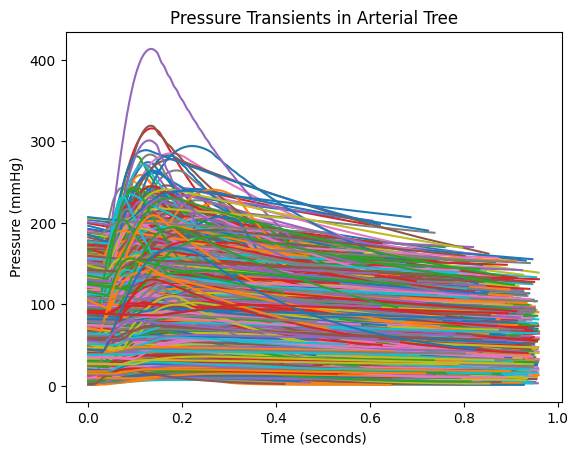

In [22]:
# Initialize the plot
fig, ax = plt.subplots()

# Loop over all realizations
for ind in range(len(test)): 
    if not isinstance(test[ind], bool):
        # Adjust time and pressure trace for each realization
        t = test[ind].loc[ind]['T'] - test[ind].loc[ind]['T'].loc[0]  # Time adjustment
        p_pat = test[ind].loc[ind]['p_pat']  # Pressure transient

        # Plot the pressure transient for each realization
        ax.plot(t, p_pat, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in Arterial Tree')

# Add legend to the plot
# ax.legend()

# Display the plot
plt.show()

In [23]:
ind = 0
p_pat_raw = test[ind].loc[ind]['p_pat']
p_pat_raw



time_ind
0       146.524825
1       146.508514
2       146.492219
3       146.475936
4       146.459663
           ...    
996     147.745711
997     147.729182
998     147.712672
999     147.696179
1000    147.679705
Name: p_pat, Length: 1001, dtype: float64

In [24]:
## Create directory for pessure traces 
os.system(f'mkdir -p {path}/Outputs/Output_5000/pressure_traces')

0

## Save individual pressure traces, CO and dt

In [25]:
# Create column headers
headers = list(range(100)) + ['CO', 'dt']

# List to collect all pressure traces
pressure_traces_list = []

for ind in range(len(test)):
    if not isinstance(test[ind], bool):
     p_pat_raw = test[ind].loc[ind]['p_pat'].values.copy()
     T = test[ind].loc[ind]['T'].values.copy()
     T_resample = np.linspace(T[0], T[-1], 100)

     # Interpolate pressure for 100 timesteps from 1000
     p_pat_resampled = np.interp(T_resample, T, p_pat_raw)

     q_pat = test[ind].loc[ind]['q_pat'].values.copy()
     CO = np.sum(q_pat) * (T[1] - T[0]) / (T[-1] - T[0]) * 60. / 1000.  # L / min
    
     # Record time interval, approx T (input param) / 100, there are some rounding differences due to interpolation
     tl = T_resample - test[ind].loc[ind]['T'].iloc[0]
     dt = np.diff(tl)[0]

     # Create a 2D array for saving
     pressure_trace = np.hstack((p_pat_resampled, [CO], [dt]))
     pressure_traces_list.append(pressure_trace)

     # Save individual pressure trace to CSV with headers
     individual_df = pd.DataFrame([pressure_trace], columns=headers)
     individual_df.to_csv(f'{path}/Outputs/Output_5000/pressure_traces/pressuretrace_{ind}.csv', index=False)

# Convert the list of pressure traces to a DataFrame
pressure_traces_df = pd.DataFrame(pressure_traces_list, columns=headers)

# Save the DataFrame to a single CSV file with headers
pressure_traces_df.to_csv(f'{path}/Outputs/Output_5000/pressure_traces/all_pressure_traces.csv', index=False)

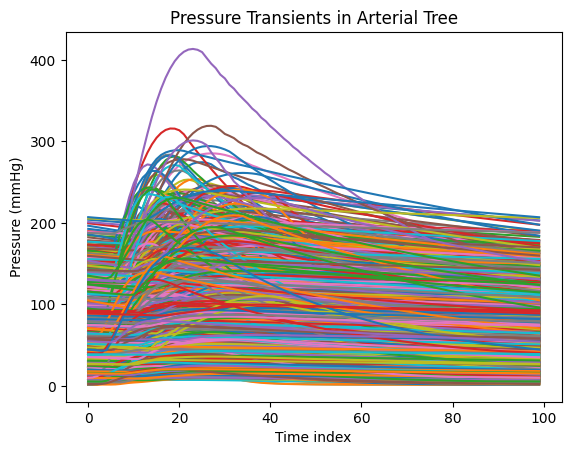

In [26]:
# Initialize the plot
fig, ax = plt.subplots()

# Loop over all realizations
for ind in range(len(test)): 
    if not isinstance(test[ind], bool):
     p_pat_raw = test[ind].loc[ind]['p_pat'].values.copy()
     T = test[ind].loc[ind]['T'] - test[ind].loc[ind]['T'].loc[0]  # Time adjustment
     T = T.values.copy()
     T_resample = np.linspace(T[0], T[-1], 100)
    

     # Interpolate pressure for 100 timesteps from 1000
     p_pat_resampled = np.interp(T_resample, T, p_pat_raw)

     # Plot the interpolated pressure transient for each realization
     ax.plot(list(range(100)), p_pat_resampled, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time index')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in Arterial Tree')

# Add legend to the plot
#ax.legend()

# Display the plot
plt.show()

### Conducting PCA on Pressure Traces

In [27]:
path

'/Users/pmzff/Documents/GitHub/ModularCircFF/ExploreModularCirc'

In [28]:
# Import Data

n_samples = 5000 

# Define the path to the folder containing the CSV files
folder_path = f'{path}/Outputs/Output_{n_samples}/pressure_traces'

df = pd.read_csv(f'{folder_path}/all_pressure_traces.csv')

# Print the DataFrame
print(df)

               0           1           2           3           4           5  \
0     146.524825  146.360413  146.195068  146.028672  145.863234  145.698161   
1      51.315265   50.951486   50.590820   50.233232   49.878706   49.649983   
2      25.932654   25.809413   25.686402   25.563706   25.441397   25.319534   
3     113.968529  113.726823  113.485891  113.245790  113.006427  112.767834   
4      52.186620   52.094639   52.002797   51.911098   51.819550   51.728156   
...          ...         ...         ...         ...         ...         ...   
4980   44.586610   44.033895   43.496811   42.974925   43.760598   53.362640   
4981   15.345379   15.281605   15.217959   15.154498   15.091228   15.028133   
4982  115.620386  115.169954  114.721779  114.275851  113.832156  113.390686   
4983   88.936803   88.771227   88.606200   88.441722   88.277791   88.114403   
4984   54.708071   54.469970   54.231711   53.992350   53.753943   53.645190   

               6           7           

In [42]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Copy the data and separate the target variable (only pressure traces)
#X = df # traces + CO + dt
#X = df.iloc[:,:101].copy() # traces + CO
X = df.iloc[:,:100].copy() # traces only

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it - standardize
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names, index=df.index)

X_pca.head()



PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  20.360642 -2.654315  0.683311  0.448373 -0.012273  0.235895  0.051955   
1  -0.526113  1.684535  0.544905 -0.072142 -0.558138  0.205148 -0.074678   
2 -10.024585 -0.309067 -0.130408 -0.102743 -0.098972  0.023831  0.023974   
3  13.154130 -0.787218  0.543942 -0.326400  0.019921  0.023867  0.176127   
4  -4.092361 -1.176674  0.042998  0.113526  0.106787 -0.010773 -0.052881   

        PC8       PC9      PC10  
0  0.021795 -0.077315 -0.093788  
1  0.019054  0.004528  0.002763  
2  0.020415 -0.009646  0.001757  
3  0.011336 -0.054027 -0.051029  
4  0.035672  0.018335  0.015840

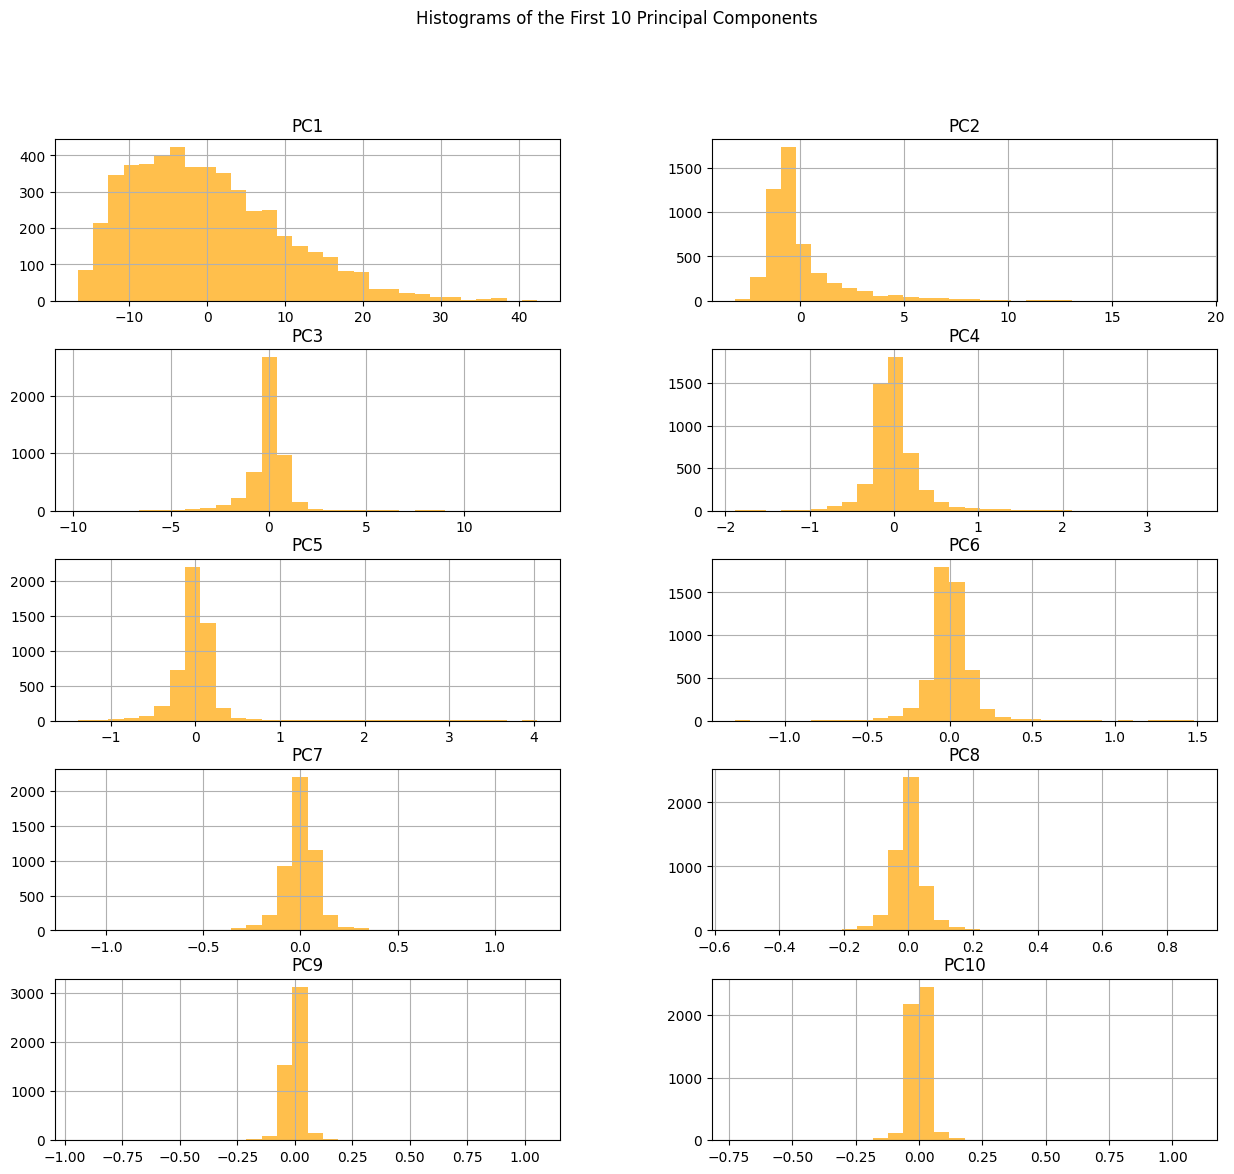

In [43]:
# Plot Histograms
X_pca.hist(bins=30, figsize=(15, 13), layout=(5, 2), alpha=0.7, color='orange')
plt.suptitle('Histograms of the First 10 Principal Components')
plt.show()

In [44]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    explained_variance_ratio = pca.explained_variance_ratio_
    axs[0].bar(grid, explained_variance_ratio, log=True)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )

    # Cumulative Variance
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)
    axs[1].semilogy(grid, cumulative_explained_variance, "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", 
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    fig.tight_layout()
    return axs

/var/folders/28/nchybyxs1ps5wk3zmnqdpd8r0000gr/T/ipykernel_62966/1737913637.py:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[0].set(


array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

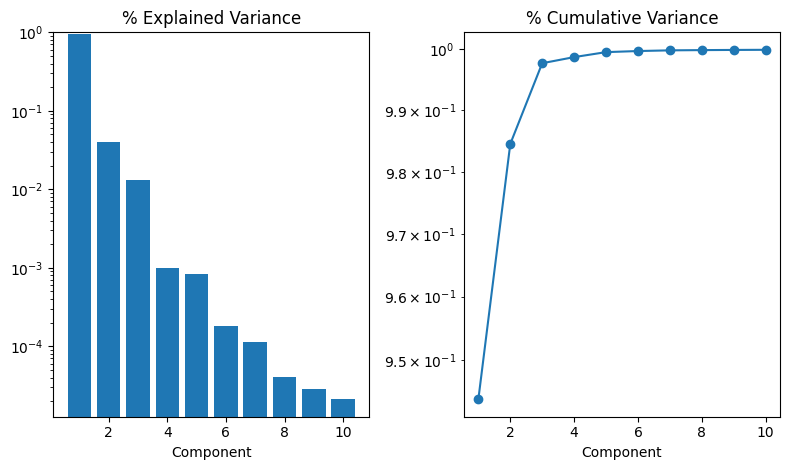

In [45]:
plot_variance(pca)

In [46]:
path

'/Users/pmzff/Documents/GitHub/ModularCircFF/ExploreModularCirc'

In [47]:
os.system(f'mkdir -p {path}/Outputs/Output_5000/PCA')

# Save first 3 Principle Component data
for i in list(range(3)):

 PC = X_pca.iloc[:,i]
 PC.to_csv(f'{path}/Outputs/Output_5000/PCA/press_only_PC{i+1}.csv', index=False)






### Save sampled input variables corresponsing to non failed runs

In [67]:
corrected_input = br.samples.copy().drop(bool_indices)
corrected_input

sas.r     sas.c     sas.l     sat.r     sat.c     sat.l     svn.r  \
0     0.004052  0.114509  0.000053  0.925069  1.023913  0.001803  0.069190   
1     0.001690  0.072214  0.000067  1.558170  1.846973  0.001607  0.088602   
2     0.002818  0.089454  0.000044  0.593984  2.035777  0.001217  0.052570   
3     0.003680  0.047260  0.000092  1.235169  1.211961  0.002196  0.108168   
4     0.003279  0.090641  0.000076  1.092825  1.574651  0.002106  0.042848   
...        ...       ...       ...       ...       ...       ...       ...   
4995  0.003680  0.042290  0.000053  1.321360  0.811489  0.000927  0.045077   
4996  0.003237  0.095746  0.000038  1.198833  1.173799  0.001674  0.110938   
4997  0.002598  0.058468  0.000082  0.766095  1.997614  0.001710  0.054179   
4998  0.002226  0.100719  0.000059  1.394404  2.185274  0.002156  0.086115   
4999  0.004365  0.063505  0.000077  0.953061  1.362216  0.001230  0.067885   

          svn.c     pas.r     pas.c  ...   la.tpww   ra.tpww     lv.td  \
0     18.228856  0.001374  0.245804  ...  0.082138  0.082138  0.394829   
1     30.052234  0.002245  0.139568  ...  0.035587  0.035587  0.159482   
2     22.333355  0.002551  0.098213  ...  0.093059  0.093059  0.423928   
3     10.414924  0.001922  0.191447  ...  0.036834  0.036834  0.262613   
4     24.249495  0.002967  0.173215  ...  0.032319  0.032319  0.232612   
...         ...       ...       ...  ...       ...       ...       ...   
4995  19.707024  0.002716  0.129187  ...  0.085073  0.085073  0.330018   
4996  27.768776  0.001673  0.237409  ...  0.066205  0.066205  0.328859   
4997  16.510909  0.002802  0.142241  ...  0.025763  0.025763  0.173452   
4998  14.054665  0.002496  0.095354  ...  0.114201  0.114201  0.472464   
4999  25.257517  0.001125  0.200008  ...  0.051497  0.051497  0.263852   

         rv.td     sas.v       sat.v       svn.v      pas.v       pat.v  \
0     0.394829  4.605936   41.185107  733.223967   9.887054  186.181413   
1     0.159482  1.687279   43.154403  702.168614   3.260990   15.274812   
2     0.423928  1.166739   26.552511  291.292518   1.280984   55.160589   
3     0.262613  2.917148   74.808422  642.862540  11.817070  146.815021   
4     0.232612  1.626089   28.248987  435.031964   3.107457   54.806199   
...        ...       ...         ...         ...        ...         ...   
4995  0.330018  1.797523   34.491851  837.635594   5.491033   28.548577   
4996  0.328859  1.218946   14.943723  353.526437   3.022469   71.996835   
4997  0.173452  2.094086   71.546334  591.353022   5.094482   34.114117   
4998  0.472464  7.050644  152.976643  983.874428   6.675129  225.742789   
4999  0.263852  1.449846   31.099843  576.637497   4.566259   46.978069   

            pvn.v  
0     1122.709993  
1      407.629673  
2      290.822845  
3      727.285469  
4      251.981040  
...           ...  
4995   825.647980  
4996   210.873133  
4997   950.828966  
4998   740.861105  
4999   470.731659  

[4985 rows x 69 columns]

In [70]:
np.savetxt(path+f'/Input/input_{n_sample}_converged.csv', corrected_input, header=input_header, delimiter=',')